# Problem Statement

A city in central Iowa, United States, Ames hosts a population of 65,000 residents. Best known for being the home of the Iowa State University(ISU), Ames was also ranked ninth on a (["Best Places to Live"](https://money.cnn.com/magazines/moneymag/bplive/2010/snapshots/PL1901855.html)) list. For people looking to root in Iowa, a property doubles as a home as well as an investment. When people pick out homes, or do renovations, it's entirely possible to lose out on the investment by overpaying for bad property, or by making bad decisions during renovations. 

This project aims to find the answer for `which variables predict the valuation of property` in Ames, Iowa for new homeowners to better understand how property valuation works.

This project aims to solve this problem by utilizing regression models to determine the features that can influence the price of property in Ames and to which extent these features predict the prices. <br/>Divided into two Jupyer Notebooks: The first in which I clean the data, and the second where I plot out the data and fit it to models to isolate and define the extent of variables & their interconnected relationships in determining the price of the property. 


### Content

- [Dealing With Nulls](#Dealing-With-Nulls)
- [Change ordinal to numerical](#Change-ordinal-to-numerical)
- [One Hot Encoding for Categoricals](#One-Hot-Encoding-for-Categoricals)
- [Repeating Everything for Test Data](#Test-Data)

# Data Dictionary
The Data Dictionary can be found ([here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data))

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [3]:
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

In [4]:
test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')

In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(879, 80)

In [7]:
train.columns[:-1] == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
test.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [10]:
train.dtypes

id                 int64
pid                int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
street            object
alley             object
lotshape          object
landcontour       object
utilities         object
lotconfig         object
landslope         object
neighborhood      object
condition1        object
condition2        object
bldgtype          object
housestyle        object
overallqual        int64
overallcond        int64
yearbuilt          int64
yearremod/add      int64
roofstyle         object
roofmatl          object
exterior1st       object
exterior2nd       object
masvnrtype        object
masvnrarea       float64
exterqual         object
extercond         object
foundation        object
bsmtqual          object
bsmtcond          object
bsmtexposure      object
bsmtfintype1      object
bsmtfinsf1       float64
bsmtfintype2      object
bsmtfinsf2       float64
bsmtunfsf        float64
totalbsmtsf      float64


In [11]:
train.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

Upon checking the data dictionary, it seems that most of the object or non-numerical data types are categorical or ordinal. I will strategize a way to deal with them after I deal with the nulls so I can EDA to have a better look at the distribution. 

# Dealing With Nulls

- In general, my strategy was to break the nulls into 
- In smaller quantities, I perceived the amounts to be an input error. 
- Medium quantities that I classified as between 20-999, I decided to have an indepth look at. 
- Larger quantities however, indicated to me a higher intentionality behind the null value. As an example, in the 'alley' variable, I perceived the null value to mean the lack of an alley altogether.

- However, as I progressed, I found it was easier to categorize the null data through the data dictionary. For example, I ended up classifying garage null counts together, as most of the entries were null across the row. 


In [12]:
def null_count():
    train_null_columns = train.columns[train.isnull().any()]
    null_count = train[train_null_columns].isnull().sum().sort_values(ascending=False)
    return null_count

In [13]:
null_count()

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
lotfrontage      330
garageyrblt      114
garagecond       114
garagequal       114
garagefinish     114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtcond          55
bsmtqual          55
bsmtfintype1      55
masvnrtype        22
masvnrarea        22
bsmthalfbath       2
bsmtfullbath       2
garagecars         1
bsmtfinsf1         1
bsmtfinsf2         1
bsmtunfsf          1
garagearea         1
totalbsmtsf        1
dtype: int64

In [14]:
#Simple function to replace nulls
def fill_null(df, col, i):
    df[col] = df[col].fillna(i)

In [15]:
train_small_nulls = train[['bsmthalfbath', 'bsmtfullbath', 'garagecars', 'garagearea', 'bsmtunfsf', 'bsmtfinsf2', 'totalbsmtsf', 'bsmtfinsf1']]

In [16]:
train_small_nulls.describe()

,bsmthalfbath,bsmtfullbath,garagecars,garagearea,bsmtunfsf,bsmtfinsf2,totalbsmtsf,bsmtfinsf1
count,2049.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,0.063446,0.427526,1.776585,473.671707,567.728293,47.959024,1057.987805,442.300488
std,0.251705,0.522673,0.764537,215.934561,444.954786,165.000901,449.410704,461.204124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,319.000000,220.000000,0.000000,793.000000,0.000000
50%,0.000000,0.000000,2.000000,480.000000,474.500000,0.000000,994.500000,368.000000
75%,0.000000,1.000000,2.000000,576.000000,811.000000,0.000000,1318.750000,733.750000
max,2.000000,3.000000,5.000000,1418.000000,2336.000000,1474.000000,6110.000000,5644.000000


For the smaller null amounts, I will append the mean since they happen to be floats. 

In [17]:
def fill_small():
    for i in train_small_nulls:
        fill_null(train, i, train[i].mean())
        print (f'Null value in {i} replaced with mean:') 
        print (train[i].mean())
fill_small()

Null value in bsmthalfbath replaced with mean:
0.0634455832113226
Null value in bsmtfullbath replaced with mean:
0.4275256222547584
Null value in garagecars replaced with mean:
1.7765853658536586
Null value in garagearea replaced with mean:
473.6717073170732
Null value in bsmtunfsf replaced with mean:
567.7282926829268
Null value in bsmtfinsf2 replaced with mean:
47.959024390243904
Null value in totalbsmtsf replaced with mean:
1057.9878048780488
Null value in bsmtfinsf1 replaced with mean:
442.30048780487806


In [18]:
null_count()

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
lotfrontage      330
garageyrblt      114
garagefinish     114
garagequal       114
garagecond       114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtfintype1      55
bsmtcond          55
bsmtqual          55
masvnrarea        22
masvnrtype        22
dtype: int64

In [19]:
train_med_nulls = train[['lotfrontage', 'garagefinish', 'garagecond','garagequal','garageyrblt','garagetype','bsmtexposure','bsmtfintype2','bsmtfintype1','bsmtcond','bsmtqual','masvnrtype','masvnrarea']]

In [20]:
train_med_nulls.head()

,lotfrontage,garagefinish,garagecond,garagequal,garageyrblt,garagetype,bsmtexposure,bsmtfintype2,bsmtfintype1,bsmtcond,bsmtqual,masvnrtype,masvnrarea
0,NaN,RFn,TA,TA,1976.0,Attchd,No,Unf,GLQ,TA,TA,BrkFace,289.0
1,43.0,RFn,TA,TA,1997.0,Attchd,No,Unf,GLQ,TA,Gd,BrkFace,132.0
2,68.0,Unf,TA,TA,1953.0,Detchd,No,Unf,GLQ,TA,TA,None,0.0
3,73.0,Fin,TA,TA,2007.0,BuiltIn,No,Unf,Unf,TA,Gd,None,0.0
4,82.0,Unf,TA,TA,1957.0,Detchd,No,Unf,Unf,Gd,Fa,None,0.0


In [21]:
train_med_nulls.dtypes

lotfrontage     float64
garagefinish     object
garagecond       object
garagequal       object
garageyrblt     float64
garagetype       object
bsmtexposure     object
bsmtfintype2     object
bsmtfintype1     object
bsmtcond         object
bsmtqual         object
masvnrtype       object
masvnrarea      float64
dtype: object

In [22]:
train_med_nulls.describe()

,lotfrontage,garageyrblt,masvnrarea
count,1721.000000,1937.000000,2029.000000
mean,69.055200,1978.707796,99.695909
std,23.260653,25.441094,174.963129
min,21.000000,1895.000000,0.000000
25%,58.000000,1961.000000,0.000000
50%,68.000000,1980.000000,0.000000
75%,80.000000,2002.000000,161.000000
max,313.000000,2207.000000,1600.000000


- lotfrontage: Linear feet of street connected to property
- garageyrblt: Year garage was built
- masvnrarea: Masonry veneer area in square feet

In [23]:
train['lotfrontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lotfrontage, dtype: float64

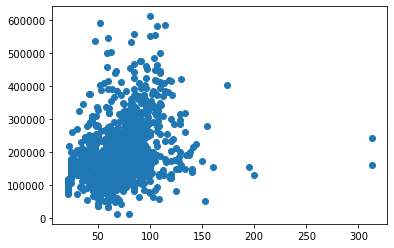

In [24]:
plt.scatter(train['lotfrontage'], train['saleprice']);
#Appending median since there doesn't seem to be any significant link

In [25]:
lotfrontage_median = train['lotfrontage'].median()
lotfrontage_median

68.0

In [26]:
fill_null(train, 'lotfrontage', lotfrontage_median)

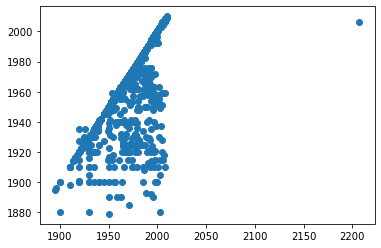

In [27]:
plt.scatter(train['garageyrblt'], train['yearbuilt']);

In [28]:
#Most of them seem to be built in the same year 
(train['garageyrblt'] == train['yearbuilt']).sum() / len(train['garageyrblt'])*100

76.25548512920527

In [29]:
#Just thought it was an odd observation that some of the garages were built before houses, 
#Not impossible, just odd.
(train['garageyrblt'] < train['yearbuilt']).sum() 

11

Since 76% of garages were built within the same year as the house, I think the idea for now will be to remove the outlier from year 2200+ & subsequently replace nulls with the median. 
<br/> The alternative would be to replace them with the year the house was built, but for now the idea will be to stick to the median since it would have the least impact on my data. 

In [30]:
train.loc[train['garageyrblt'] > 2050,['yearbuilt']]

,yearbuilt
1699,2006


In [31]:
#Changed the outlier to the year the house was built
train.loc[1699,'garageyrblt'] = 2006

In [32]:
garageyr_median = train['garageyrblt'].median()
garageyr_median

1980.0

In [33]:
fill_null(train, 'garageyrblt', garageyr_median)

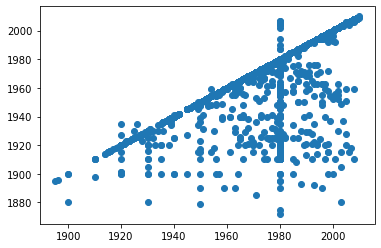

In [34]:
plt.scatter(train['garageyrblt'], train['yearbuilt']);

In [35]:
null_count()

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
garagecond       114
garagequal       114
garagefinish     114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtfintype1      55
bsmtcond          55
bsmtqual          55
masvnrarea        22
masvnrtype        22
dtype: int64

In [36]:
masonry = ['masvnrtype', 'masvnrarea']
train[masonry].dtypes

masvnrtype     object
masvnrarea    float64
dtype: object

In [37]:
train[masonry][train[masonry].isna().any(axis=1)].isnull().sum()

masvnrtype    22
masvnrarea    22
dtype: int64

In [38]:
fill_null(train,'masvnrtype', 'None')

In [39]:
fill_null(train,'masvnrarea', 0)

Since the null values are in similar rows, I will assume this information was intentionally left out for a lack of. 
<br/>I will replace nulls in 
masvnrtype to 'None' and nulls in masvnrarea to '0'
<br/>Additionally, I will replace all 'None' values in masvnrtype to 'NA'for overall data consistency with other columns.

In [40]:
train['masvnrtype'].replace('None', 'NA', inplace=True)

In [41]:
train['masvnrtype'].value_counts()

NA         1240
BrkFace     630
Stone       168
BrkCmn       13
Name: masvnrtype, dtype: int64

In [42]:
null_count()

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
garagecond       114
garagequal       114
garagefinish     114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtfintype1      55
bsmtcond          55
bsmtqual          55
dtype: int64

In [43]:
garage = ['garagetype','garagefinish','garagecond','garagequal']

In [44]:
train[garage][train[garage].isna().any(axis=1)]

,garagetype,garagefinish,garagecond,garagequal
28,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN


In [45]:
train['garagetype'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garagetype, dtype: int64

Because 1712 was an outlier I decided to go ahead and drop the row. 

In [46]:
train.drop(1712, inplace=True)

In [47]:
fill_null(train, garage, 'NA')

In [48]:
null_count()

poolqc          2041
miscfeature     1985
alley           1910
fence           1651
fireplacequ      999
bsmtexposure      58
bsmtfintype2      56
bsmtfintype1      55
bsmtcond          55
bsmtqual          55
dtype: int64

Since the Garage Nulls are largely similar, we can assume the data was input due to a lack of. Appending all values to NA

In [49]:
basement = ['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2']

In [50]:
train[basement][train[basement].isna().any(axis=1)]

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2
12,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN


In [51]:
fill_null(train, basement, 'NA')

In [52]:
null_count()

poolqc         2041
miscfeature    1985
alley          1910
fence          1651
fireplacequ     999
dtype: int64

### Large Nulls 

In [53]:
train['poolqc'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: poolqc, dtype: int64

In [54]:
train['miscfeature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: miscfeature, dtype: int64

In [55]:
train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [56]:
train['fence'].value_counts()

MnPrv    226
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [57]:
train['fireplacequ'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplacequ, dtype: int64

In [58]:
train.drop(columns = ['poolqc', 'miscfeature'], inplace= True)

#### Alley, Fence & Fireplace fill with NA
Following the above, since the bulk majority of this data was null, I will assume the intention was for it to depict a lack of these.

In [59]:
misc_null = ['alley', 'fence', 'fireplacequ']

In [60]:
fill_null(train, misc_null, 'NA')

In [61]:
train.isnull().any().sum()

0

# Change ordinal to numerical

In [62]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,0,3,2010,WD,138500


In [63]:
train_objects = train.select_dtypes(object)

In [64]:
train_objects.describe()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,fence,saletype
count,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050
unique,7,2,3,4,4,3,5,3,28,9,8,5,8,6,6,15,15,4,4,5,6,6,6,5,7,7,5,5,2,5,4,8,6,7,4,6,6,3,5,9
top,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,NA,WD
freq,1598,2043,1910,1294,1842,2048,1502,1952,310,1766,2024,1699,1059,1618,2024,724,721,1239,1246,1777,926,887,1833,1338,615,1748,2017,1064,1909,1867,1047,1914,999,1213,849,1832,1868,1860,1651,1780


In [65]:
#ExterQual: Exterior material quality
train['exterqual'] = train['exterqual'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#ExterCond: Present condition of the material on the exterior
train['extercond'] = train['extercond'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#BsmtQual: Height of the basement
train['bsmtqual'] = train['bsmtqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtCond: General condition of the basement
train['bsmtcond'] = train['bsmtcond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtExposure: Walkout or garden level basement walls
train['bsmtexposure'] = train['bsmtexposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NA':0})
#BsmtFinType1: Quality of basement finished area
train['bsmtfintype1'] = train['bsmtfintype1'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#BsmtFinType2: Quality of second finished area (if present)
train['bsmtfintype2'] = train['bsmtfintype2'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#HeatingQC: Heating quality and condition
train['heatingqc'] = train['heatingqc'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#KitchenQual: Kitchen quality
train['kitchenqual'] = train['kitchenqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#FireplaceQu: Fireplace quality
train['fireplacequ'] = train['functional'].map({'Typ': 8,'Min1': 7,'Min2': 6,'Mod': 5,'Maj1': 4,'Maj2':3,'Sev':2,'Sal':1})
#GarageFinish: Interior finish of the garage
train['garagefinish'] = train['garagefinish'].map({'Fin': 3,'RFn': 2,'Unf': 1,'NA':0})
#GarageQual: Garage quality
train['garagequal'] = train['garagequal'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#GarageCond: Garage condition
train['garagecond'] = train['garagecond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})

In [66]:
train.select_dtypes(object).columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'foundation', 'heating', 'centralair',
       'electrical', 'functional', 'garagetype', 'paveddrive', 'fence',
       'saletype'],
      dtype='object')

In [67]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,8,Attchd,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,8,Attchd,1997.0,2,2.0,559.0,3,3,Y,0,74,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,8,Detchd,1953.0,1,1.0,246.0,3,3,Y,0,52,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,8,BuiltIn,2007.0,3,2.0,400.0,3,3,Y,100,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,8,Detchd,1957.0,1,2.0,484.0,3,3,N,0,59,0,0,0,0,NA,0,3,2010,WD,138500


In [68]:
train.to_csv('datasets/train_cleaned.csv',index=False)

The abundance of information given in this dataset is more than adequate to build a reliable accurate model to serve as a predictor for property value. With the vast amount of categorical data, it should be possible to gain insight on more obsecure values rather than simply the squarefootage of the house for example. 

However trivial, anything that can build an advantage for the new homeowner will be considered. 

# One Hot Encoding for Categoricals

In [69]:
train_dummies = pd.get_dummies(train.select_dtypes(object))
train_dummies

,mszoning_A (agr),mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NA,alley_Pave,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Gtl,landslope_Mod,landslope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_ClyTile,roofmatl_CompShg,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_NA,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_N,centralair_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj1,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,paveddrive_N,paveddrive_P,paveddrive_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [70]:
train_dummies.to_csv('datasets/train_dummies.csv',index=False)

In [71]:
train.select_dtypes(exclude= object).columns

Index(['id', 'pid', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremod/add', 'masvnrarea', 'exterqual',
       'extercond', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1',
       'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'heatingqc', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea',
       'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
       'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'fireplaces',
       'fireplacequ', 'garageyrblt', 'garagefinish', 'garagecars',
       'garagearea', 'garagequal', 'garagecond', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saleprice'],
      dtype='object')

# Test Data

In [72]:
train.shape

(2050, 79)

In [73]:
def test_null_count():
    test_null_columns = test.columns[test.isnull().any()]
    test_null_count = test[test_null_columns].isnull().sum().sort_values(ascending=False)
    return test_null_count

In [74]:
test_null_count()

poolqc          875
miscfeature     838
alley           821
fence           707
fireplacequ     422
lotfrontage     160
garageyrblt      45
garagefinish     45
garagequal       45
garagecond       45
garagetype       44
bsmtfintype2     25
bsmtfintype1     25
bsmtexposure     25
bsmtcond         25
bsmtqual         25
masvnrarea        1
masvnrtype        1
electrical        1
dtype: int64

In [75]:
test.drop(columns = ['poolqc', 'miscfeature'], inplace= True)

In [76]:
test_null_columns = test.columns[test.isnull().any()]
test_null_columns

Index(['lotfrontage', 'alley', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'electrical', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagequal', 'garagecond', 'fence'],
      dtype='object')

In [77]:
test[test_null_columns].dtypes

lotfrontage     float64
alley            object
masvnrtype       object
masvnrarea      float64
bsmtqual         object
bsmtcond         object
bsmtexposure     object
bsmtfintype1     object
bsmtfintype2     object
electrical       object
fireplacequ      object
garagetype       object
garageyrblt     float64
garagefinish     object
garagequal       object
garagecond       object
fence            object
dtype: object

In [78]:
test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [79]:
test.shape

(879, 78)

In [80]:
814/879*100

92.6052332195677

Since 92% of the data in electrical is SBrkr, I will impute the value as SBrkr

In [81]:
test.loc[(test['electrical'].isnull())]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype
635,1578,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,0,5,2008,WD


In [82]:
test.loc[635,'electrical'] = 'SBrkr'

In [83]:
test_null_count()

alley           821
fence           707
fireplacequ     422
lotfrontage     160
garagecond       45
garagequal       45
garagefinish     45
garageyrblt      45
garagetype       44
bsmtfintype2     25
bsmtfintype1     25
bsmtexposure     25
bsmtcond         25
bsmtqual         25
masvnrarea        1
masvnrtype        1
dtype: int64

In [84]:
test_null_obj = test[test_null_columns].select_dtypes(object)
test_null_obj = test_null_obj.columns

In [85]:
test[test_null_obj].dtypes

alley           object
masvnrtype      object
bsmtqual        object
bsmtcond        object
bsmtexposure    object
bsmtfintype1    object
bsmtfintype2    object
electrical      object
fireplacequ     object
garagetype      object
garagefinish    object
garagequal      object
garagecond      object
fence           object
dtype: object

In [86]:
test['masvnrtype'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: masvnrtype, dtype: int64

In [87]:
test['masvnrtype'].replace('None', 'NA', inplace=True)

In [88]:
test['masvnrtype'].value_counts()

NA         534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: masvnrtype, dtype: int64

In [89]:
fill_null(test, test_null_obj, 'NA')

In [90]:
test_null_count()

lotfrontage    160
garageyrblt     45
masvnrarea       1
dtype: int64

In [91]:
test_null_float = test[test_null_columns].select_dtypes(float)
test_null_float = test_null_float.columns

In [92]:
def fill_test_null():
    for i in test_null_float:
        fill_null(test, i, test[i].mean())
        print (f'Null value in {i} replaced with mean:') 
        print (train[i].mean())
fill_test_null()

Null value in lotfrontage replaced with mean:
68.89463414634146
Null value in masvnrarea replaced with mean:
98.67463414634146
Null value in garageyrblt replaced with mean:
1978.6809756097562


In [93]:
test.isnull().any().sum()

0

# Test Ordinal Data

In [94]:
#ExterQual: Exterior material quality
test['exterqual'] = test['exterqual'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#ExterCond: Present condition of the material on the exterior
test['extercond'] = test['extercond'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#BsmtQual: Height of the basement
test['bsmtqual'] = test['bsmtqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtCond: General condition of the basement
test['bsmtcond'] = test['bsmtcond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtExposure: Walkout or garden level basement walls
test['bsmtexposure'] = test['bsmtexposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NA':0})
#BsmtFinType1: Quality of basement finished area
test['bsmtfintype1'] = test['bsmtfintype1'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#BsmtFinType2: Quality of second finished area (if present)
test['bsmtfintype2'] = test['bsmtfintype2'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#HeatingQC: Heating quality and condition
test['heatingqc'] = test['heatingqc'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#KitchenQual: Kitchen quality
test['kitchenqual'] = test['kitchenqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#FireplaceQu: Fireplace quality
test['fireplacequ'] = test['functional'].map({'Typ': 8,'Min1': 7,'Min2': 6,'Mod': 5,'Maj1': 4,'Maj2':3,'Sev':2,'Sal':1})
#GarageFinish: Interior finish of the garage
test['garagefinish'] = test['garagefinish'].map({'Fin': 3,'RFn': 2,'Unf': 1,'NA':0})
#GarageQual: Garage quality
test['garagequal'] = test['garagequal'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#GarageCond: Garage condition
test['garagecond'] = test['garagecond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})

In [95]:
test.to_csv('datasets/test_cleaned.csv',index=False)

In [96]:
test_dummies = pd.get_dummies(test.select_dtypes(object))
test_dummies

,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NA,alley_Pave,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_AllPub,utilities_NoSewr,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Gtl,landslope_Mod,landslope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_PreCast,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_PreCast,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_NA,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,centralair_N,centralair_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_SBrkr,functional_Maj1,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,paveddrive_N,paveddrive_P,paveddrive_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_VWD,saletype_WD
0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,1,

In [97]:
test_dummies.to_csv('datasets/test_dummies.csv', index=False)